In [13]:
install.packages("tidyverse", dependencies = TRUE)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘covr’, ‘feather’, ‘mockr’





The downloaded binary packages are in
	/var/folders/80/5qy32fkj60j1kv9n8rlpvtbc0000gn/T//RtmpwxIoQu/downloaded_packages


In [14]:
install.packages("Rtsne")


The downloaded binary packages are in
	/var/folders/80/5qy32fkj60j1kv9n8rlpvtbc0000gn/T//RtmpwxIoQu/downloaded_packages


In [19]:
install.packages("skimr")


The downloaded binary packages are in
	/var/folders/80/5qy32fkj60j1kv9n8rlpvtbc0000gn/T//RtmpwxIoQu/downloaded_packages


In [20]:
library(tidyverse)
library(Rtsne)
library(skimr)

**Question 1**

In [25]:
## a)
wine <- read.csv("~/Downloads/wine.csv")
head(wine)

## b)
glimpse(wine)

## c)
summary(wine)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

**Question 2**

In [26]:
## a)
wine_scaled <- wine %>%
  mutate(across(.cols = -class, .fns = function(x) as.numeric(scale(x))))
                
head(wine_scaled)
                
## b)
## After looking at the summary of the table, the range of the data across variables was very different. Now
## that the data is centered and scaled, each variable will be comparable to another so that the PCA will be
## "fair" to all variables. The variables are also centered, so they are equal with zero mean.

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939,1
2,0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635,1
3,0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370,1
4,1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680,1
5,0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747,1
6,1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072,1


**Question 3**

Standard deviations (1, .., p=14):
 [1] 2.2797841 1.5802028 1.2025279 0.9608805 0.9317684 0.8131917 0.7435811
 [8] 0.5910663 0.5401830 0.5078404 0.4752135 0.4108322 0.3424757 0.2085970

Rotation (n x k) = (14 x 14):
                                       PC1          PC2           PC3
Alcohol                       -0.139554110 -0.483986584 -0.2073937774
Malicacid                      0.231278771 -0.224052306  0.0888801156
Ash                           -0.000758731 -0.315929724  0.6261495205
Alcalinity_of_ash              0.230293094  0.011263089  0.6120248225
Magnesium                     -0.131041028 -0.300236426  0.1308963493
Total_phenols                 -0.372792367 -0.066404359  0.1463803150
Flavanoids                    -0.403237284  0.002017377  0.1508538950
Nonflavanoid_phenols           0.278847444 -0.027604752  0.1701277248
Proanthocyanins               -0.291925075 -0.040561908  0.1497147503
Color_intensity                0.089426322 -0.529856997 -0.1372817801
Hue           

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

                                       PC1          PC2           PC3
Alcohol                       -0.139554110 -0.483986584 -0.2073937774
Malicacid                      0.231278771 -0.224052306  0.0888801156
Ash                           -0.000758731 -0.315929724  0.6261495205
Alcalinity_of_ash              0.230293094  0.011263089  0.6120248225
Magnesium                     -0.131041028 -0.300236426  0.1308963493
Total_phenols                 -0.372792367 -0.066404359  0.1463803150
Flavanoids                    -0.403237284  0.002017377  0.1508538950
Nonflavanoid_phenols           0.278847444 -0.027604752  0.1701277248
Proanthocyanins               -0.291925075 -0.040561908  0.1497147503
Color_intensity                0.089426322 -0.529856997 -0.1372817801
Hue                           -0.284731497  0.278364629  0.0852872184
X0D280_0D315_of_diluted_wines -0.360649938  0.163368199  0.1661269358
Proline                       -0.276412439 -0.365661893 -0.1267097530
class               

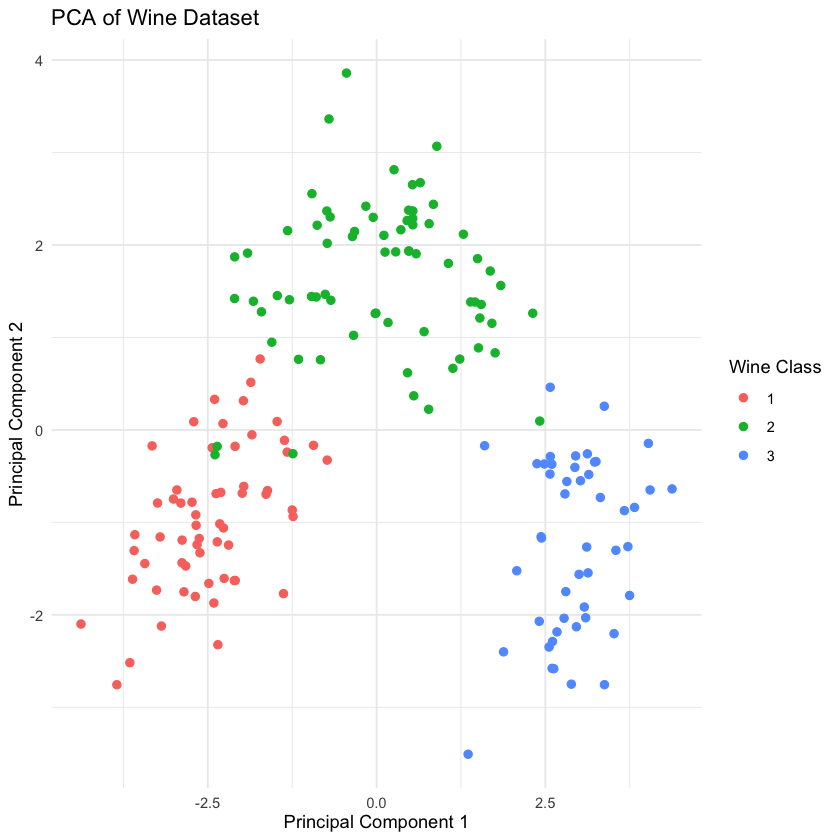

In [31]:
## a)
wine_pca <- prcomp(wine_scaled)
wine_pca
summary(wine_pca)

## b) 
# Using the summary function above, we see that PC1 has the largest standard deviation of 2.2798 and explains
# the most variance of the data. PC2 has the second largest standard deviation of 1.5802 and also explains a 
# large amount of the variance.

## c)
# We perform PCA first because it allows us to focus in on a smaller set of variables that capture most of the 
# variance. It is a simpler way to understand trends in the data before applying all variables in t-SNE or another 
# visualization.

## d)
wine_matrix <- wine_pca$rotation
print(wine_matrix)

## e)
pc1_pc2 <- as.data.frame(wine_pca$x[, 1:2]) %>%
  mutate(class = wine_scaled$class)   

colnames(pc1_pc2)[1:2] <- c("PC1", "PC2")

ggplot(pc1_pc2, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 2) + labs(title = "PCA of Wine Dataset", x = "Principal Component 1",
       y = "Principal Component 2", color = "Wine Class") + theme_minimal()

## f)
# From the graph, it appears that wines of the same class are clustered fairly close together. The features of
# each individual class are mostly distinct, but class 1 and class 2 may have some overlap in features based on
# where the points fall on the graph.

## g)
# One example where PCA fails is when the data is nonlinear. The cyclical example shows that the variation is
# the radius, which does not align with the axes. There are no rotations that could separate these axes.

## h)
# The difference between a vector space and a manifold is that a vector space sits flat and exists in the linear
# world. Vector spaces have a set of axioms that must be satisfied for any given vector. A manifold is a set
# that resembles a vector space locally. In the global context, it is a curved structure in a higher dimension. 
# PCA works well for the "flat" data while t-SNE can represent the nonlinear data and preserve the true structure.

**Question 4**

Performing PCA
Read the 178 x 10 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.610276)!
Learning embedding...
Iteration 50: error is 50.013673 (50 iterations in 0.02 seconds)
Iteration 100: error is 49.672127 (50 iterations in 0.02 seconds)
Iteration 150: error is 50.494620 (50 iterations in 0.02 seconds)
Iteration 200: error is 49.644719 (50 iterations in 0.02 seconds)
Iteration 250: error is 49.489660 (50 iterations in 0.02 seconds)
Iteration 300: error is 0.615788 (50 iterations in 0.02 seconds)
Iteration 350: error is 0.366257 (50 iterations in 0.02 seconds)
Iteration 400: error is 0.326230 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.328741 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.330742 (50 iterations in 0.01 seconds)
Fitting performed in 0.17 seconds.


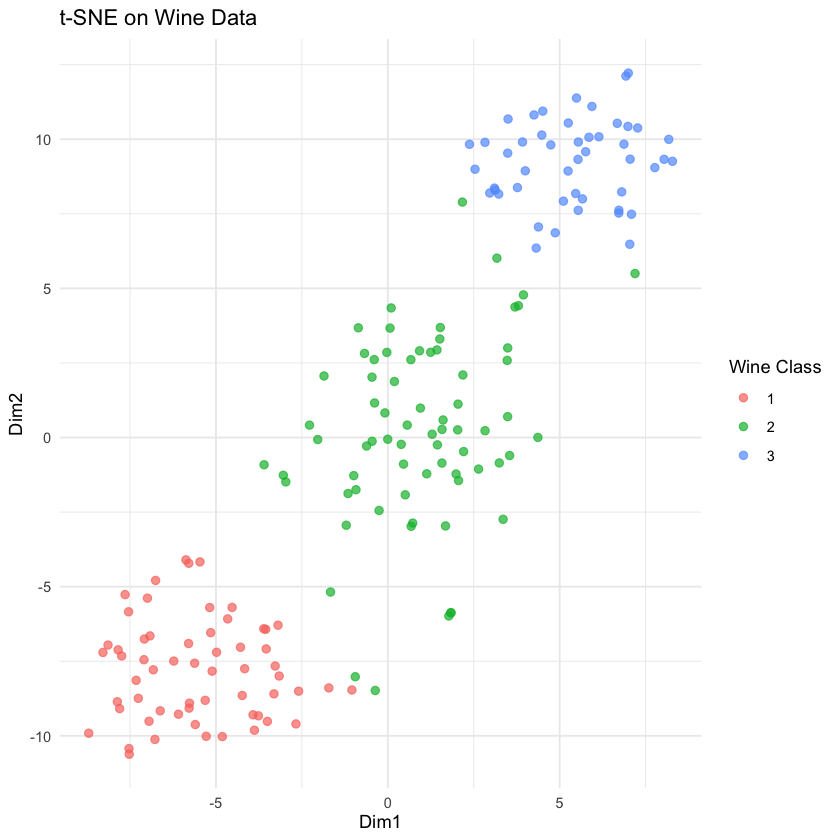

In [34]:
## a)
wine_pca10 <- as.data.frame(wine_pca$x[, 1:10])

wine_pca10 <- wine_pca10 %>% mutate(class = wine$class)

set.seed(123)
wine_tsne <- Rtsne(wine_pca10 %>% select(-class), dims = 2, perplexity = 30, verbose = TRUE, max_iter = 500)

tsne_results <- as.data.frame(wine_tsne$Y) %>%
  rename(Dim1 = V1, Dim2 = V2) %>%
  mutate(class = wine_pca10$class)

## b)
library(ggplot2)

ggplot(tsne_results, aes(x = Dim1, y = Dim2, color = factor(class))) + geom_point(alpha = 0.7, size = 2) +
  labs(title = "t-SNE on Wine Data", color = "Wine Class") + theme_minimal()

## c)
# We didn't stop at PCA because it only represents data in linear combinations, and we could be missing more
# information about the structure of the data. While PCA does separate classes, it only does so for axes that
# maximize variance.

## d)
# This workflow makes sense for datasets that have high dimensionality and likely are non-linear. T-sne can
# typically provide more information about the data than PCA could.